In [ ]:
#gini/entropy attribute given in each node represents the impurity of the node. 
#less gini more purity. 
#Gi = 1- sum ((pi)**2)      samples = 54   0,49,5     1- (0/54)**2 - (49/54)**2 - (5/54)**2  = 0.168 gini.
#Sklearn uses Cart algorithm which always generates a binary tree. every non leaf node has exactly 2 children.
#ID3 composes a node with more than 2 children.
#in sklearn, we use predict_proba to calculate class probabilities.

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets as dat
from sklearn import model_selection as mod 
from sklearn import metrics as met 

from sklearn import tree 
from sklearn.tree import export_graphviz

data = dat.load_iris()   
print(data.DESCR)
print(data.target_names) # you can get the target name.
print(data.feature_names) # you can get the feature names.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [28]:
X = data.data[:,:]
y = data.target 

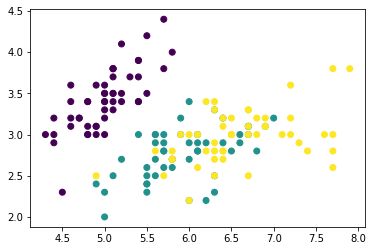

In [29]:
plt.scatter(X[:,0],X[:,1], c = y) #c is the color code and give different colors according to the target. 3 different targets in data.
plt.show()

In [31]:
X_train,X_test,y_train,y_test = mod.train_test_split(X,y,test_size = 0.33 , random_state = 42) # dividing data into train and test set.


In [32]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 2) # choose estimator.
tree_clf.fit(X_train,y_train) # fit the data.


DecisionTreeClassifier(max_depth=2)

In [33]:
y_pred = tree_clf.predict(X_test) # make the prediction.

In [34]:
tree_clf.predict_proba(X_test) # you can see the predictions with the probability assigned to it. How much you believe in prediction.

array([[0.        , 0.89473684, 0.10526316],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03225806, 0.96774194],
       [0.        , 0.89473684, 0.10526316],
       [0.        , 0.89473684, 0.10526316],
       [1.        , 0.        , 0.        ],
       [0.        , 0.89473684, 0.10526316],
       [0.        , 0.03225806, 0.96774194],
       [0.        , 0.89473684, 0.10526316],
       [0.        , 0.89473684, 0.10526316],
       [0.        , 0.03225806, 0.96774194],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.89473684, 0.10526316],
       [0.        , 0.03225806, 0.96774194],
       [0.        , 0.89473684, 0.10526316],
       [0.        , 0.89473684, 0.10526316],
       [0.        , 0.03225806, 0.96774194],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03225806, 0.96774194],
       [1.

In [ ]:
# accuracy : By what percentage do the actual labels agree with the predictions?
# confusion matrix : 
#      True Negatives : Actual 0 and prediction 0
#      True positive : Actual 1 and prediction 1
#      False positive : Actual 0 and prediction 1
#      False negative : Actual 1 and prediction 0


# precision : How many of those I guessed are true?. True positive / (True positive + False positive)  
# recall : How many of those who were truly true did I say true.  True positive / (True positive + False negative)

# F1 score : harmonic mean of recall with precision.  2 / (1/p + 1/r)    = 2*p*r/(r+p)

In [ ]:
# before evaluating the result you should know the base accuracy. Data can be highly imbalanced and accuracy means nothing there.
# According to the problem & priority, evaluation metric can be changed.

In [35]:
print(met.accuracy_score(y_test, y_pred))

0.98


In [ ]:
# choosing which feature to use by minimizing the cost function in Cart. Bütün feature ve thresholdlara bakıyor.
# J = (mleft/m) *Gleft  + (mright/m) * Gright
# Regularization : 
# max_depth parameter :  prevents the tree from branching. to avoid dealing with overfitting.
# min_samples_split : the minimum number of samples a node must have before it can be split.
# min_samples_leaf : the minimum number of samples a leaf node must have.
# greedy algorithm which may not find the optimal tree. but find an efficient one. 

In [38]:
export_graphviz(
     tree_clf, #model name
     out_file = "iris_tree.dot",
     feature_names = data.feature_names[:],
     class_names = data.target_names,
     rounded = True,
     filled = True
     )

In [40]:
! dot -Tpng iris_tree.dot -o iris_tree.png   # convert dot file to png.

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
met.confusion_matrix(y_test,y_pred) # the confusion matrix

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

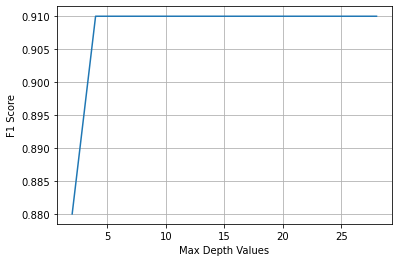

Test f1 score is 0.98


{'max_depth': 4}

In [51]:
#Regression with Decision Trees : instead of gini mse will be used.

#It takes the average of how many samples there are in each leaf node, and
#that average is your guess when going to that leaf. You can still regularize the tree with max depth etc.

# decision tree loves orthogonal decision boundaries terefore they may not be able to generalize a model perfectly. PCA can be effective to solve it.

# for imbalanced data you should not use accuracy as an evaulation metric. F1 can be better choice. 


# HyperParameter Optimization with GridSearchCV

params = { 
     "max_depth": range (2,30,2)
     }

# You can use GridSearchCV for hyperparameter optimization as shown below.

grid = mod.GridSearchCV(tree.DecisionTreeClassifier(random_state = 42),params,scoring = "accuracy")
grid.fit(X_train,y_train)

df = pd.DataFrame(grid.cv_results_)
plt.plot(df["param_max_depth"],df["mean_test_score"])
plt.grid()
plt.ylabel("F1 Score")
plt.xlabel("Max Depth Values")
plt.show()

y_pred = grid.best_estimator_.predict(X_test) # It predicts using the best estimator returning from the grid.
print("Test f1 score is", met.accuracy_score(y_test,y_pred))
grid.best_params_ # It gives the best parameters, whatever you are looking for in the grid.

In [52]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])